In [1]:
from dask.distributed import Client, progress
client = Client(threads_per_worker=4, n_workers=1)
client

Client Scheduler: tcp://127.0.0.1:49231 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 1 Cores: 4 Memory: 11.45 GB


In [2]:
import time
import random

def inc(x):
    time.sleep(random.random())
    return x + 1

def dec(x):
    time.sleep(random.random())
    return x - 1

def add(x, y):
    time.sleep(random.random())
    return x + y

In [3]:
%%time
x = inc(1)
y = dec(2)
z = add(x, y)
z

CPU times: user 75.4 ms, sys: 9.01 ms, total: 84.4 ms
Wall time: 2.16 s


In [4]:
import dask
inc = dask.delayed(inc)
dec = dask.delayed(dec)
add = dask.delayed(add)

In [5]:
x = inc(1)
y = dec(2)
z = add(x, y)
z

Delayed('add-f1a052ef-d98a-4734-964e-7506f2fb0500')

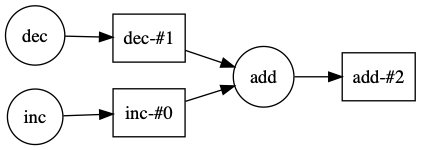

In [6]:
z.visualize(rankdir='LR')

In [7]:
%%time
z.compute()

CPU times: user 69.8 ms, sys: 8.39 ms, total: 78.2 ms
Wall time: 1.25 s


3

In [12]:
zs = []

In [13]:
%%time
for i in range(256):
    x = inc(i)
    y = dec(x)
    z = add(x, y)
    zs.append(z)

CPU times: user 21 ms, sys: 4.79 ms, total: 25.8 ms
Wall time: 22.9 ms


In [14]:
zs = dask.persist(*zs)  # trigger computation in the background

In [11]:
for i in range(10):
    client.cluster.start_worker(ncores=4)

In [16]:
L = zs
while len(L) > 1:
    new_L = []
    for i in range(0, len(L), 2):
        lazy = add(L[i], L[i + 1])  # add neighbors
        new_L.append(lazy)
    L = new_L                       # swap old list for new

dask.compute(L)

([65536],)